In [1]:
"""
Universidad Autónoma de Chihuahua
Facultad de Ingeniería
Maestría en Ingeniería en Computación
Machine Learning
Implementación Ensemble
Gael Aristides Hinojos Ramírez
384104
"""

'\nUniversidad Autónoma de Chihuahua\nFacultad de Ingeniería\nMaestría en Ingeniería en Computación\nMachine Learning\nImplementación Ensemble\nGael Aristides Hinojos Ramírez\n384104\n'

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import hashlib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [3]:
#Se lee el dataset y se describen las columnas con valores numericos
rain = pd.read_csv('weatherAUS.csv')
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#Se observa el numero de rows
len(rain)

145460

In [6]:
#Se trata de ver como son los valores de las direcciones del viento
rain['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [7]:
#Se obtienen las areas incluidas en el dataset
print(rain['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

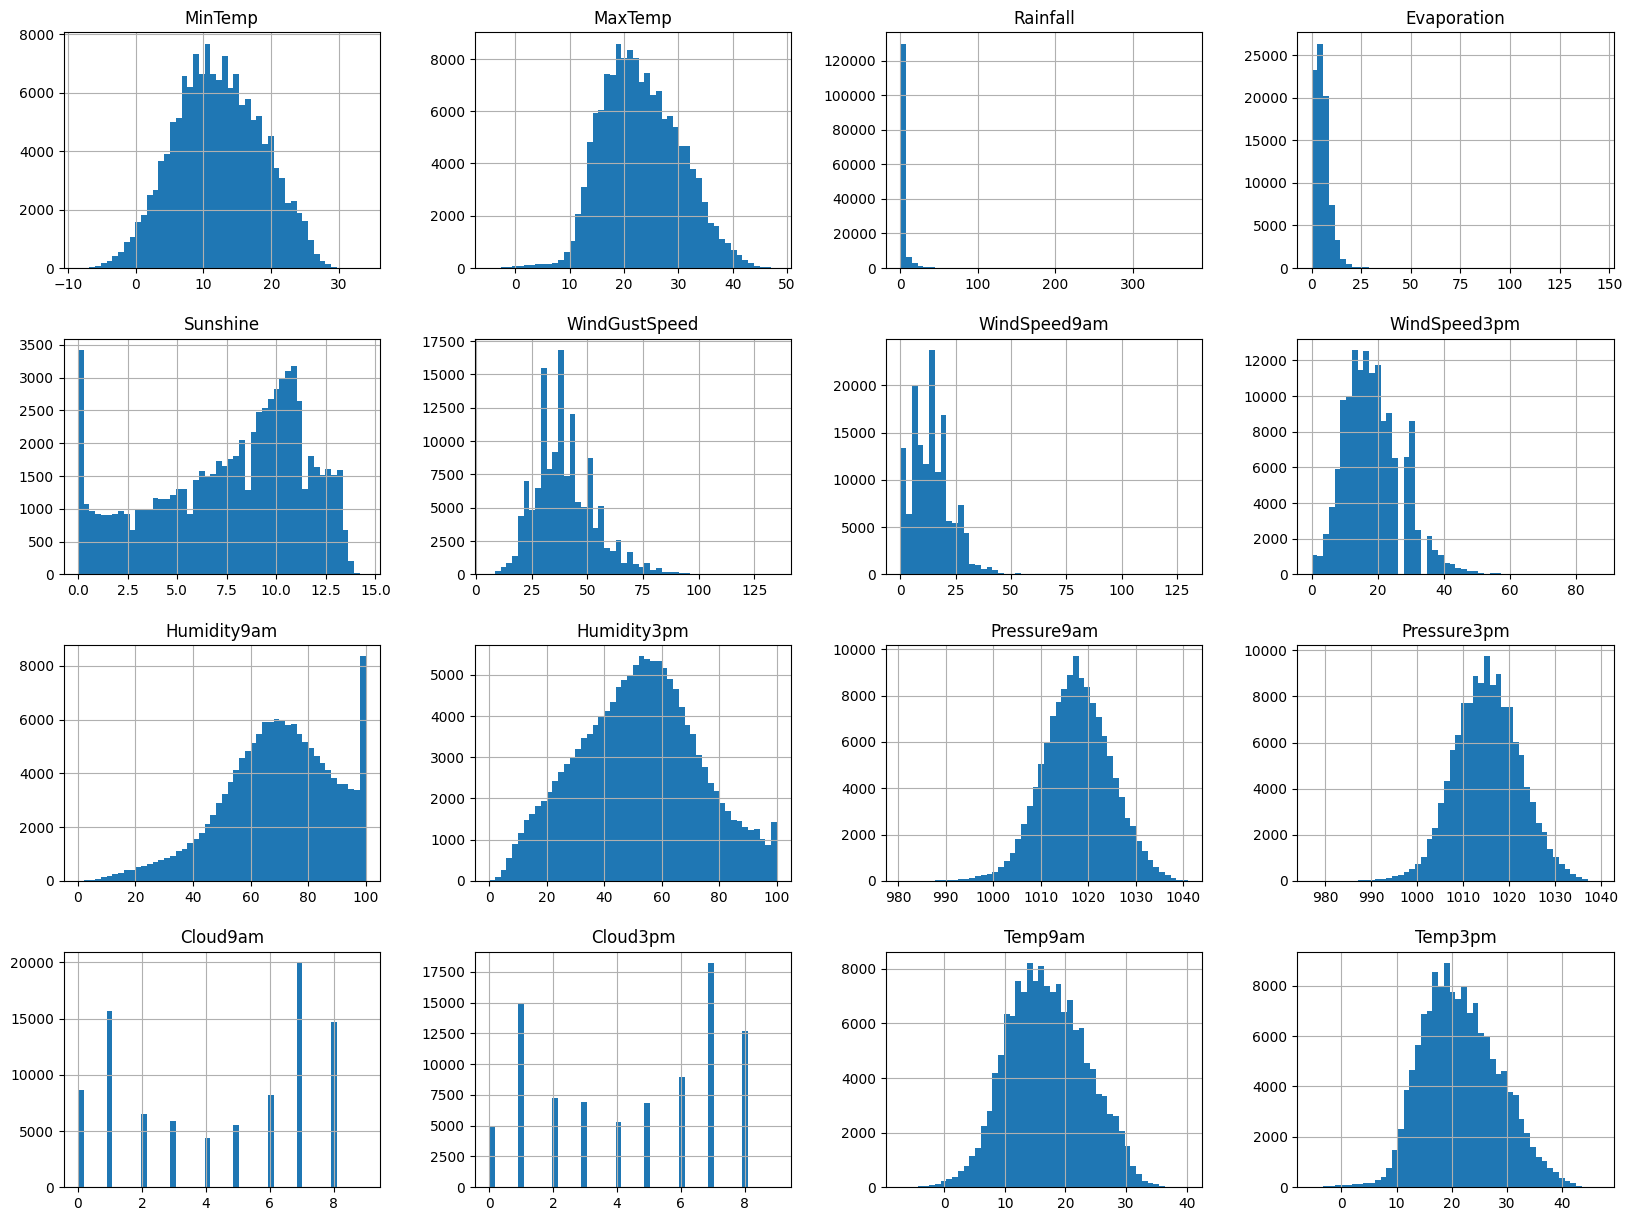

In [8]:
#Se realiza un histograma
rain.hist(bins=50, figsize=(20,15))

In [9]:
#Se separa la fecha en distintas columnas de día, mes y año
rain['Date'] = pd.to_datetime(rain['Date'])
rain['Day'] = rain['Date'].dt.day
rain['Month'] = rain['Date'].dt.month
rain['Year'] = rain['Date'].dt.year
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [10]:
#Se eliminan las columnas que tienen muchos valores nulos; se elimina la columna de date; se eliminan los rows en donde la
#columna RainTomorrow o RainToday tiene valores vacios; se observan cuantos rows quedan despues de esto
"""rain = rain.drop('Evaporation', axis=1)
rain = rain.drop('Sunshine', axis=1)"""
rain = rain.drop('Cloud9am', axis=1)
rain = rain.drop('Cloud3pm', axis=1)
rain = rain.drop('Date', axis=1)
rain.dropna(subset='RainTomorrow', inplace=True)
rain.dropna(subset='RainToday', inplace=True)
len(rain)

140787

In [11]:
#Se cambian los valores de las columnas de RainTomorrow y RainToday por valores binarios 1 y 0
rain.loc[rain['RainTomorrow'] == 'No', 'RainTomorrow'] = 0.
rain.loc[rain['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1.
rain.loc[rain['RainToday'] == 'No', 'RainToday'] = 0.
rain.loc[rain['RainToday'] == 'Yes', 'RainToday'] = 1.

In [12]:
#Se crea una matriz de correlacion con todos los valores numericos
corr_dataframe = rain[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']].copy()
corr_matrix = corr_dataframe.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.447834
RainToday        0.313097
Humidity9am      0.257727
Rainfall         0.239032
WindGustSpeed    0.234285
WindSpeed9am     0.089803
WindSpeed3pm     0.086762
MinTemp          0.084322
Month            0.007192
Day              0.005183
Year            -0.013074
Temp9am         -0.025447
MaxTemp         -0.159405
Temp3pm         -0.192747
Pressure3pm     -0.228192
Pressure9am     -0.248253
Name: RainTomorrow, dtype: float64

In [13]:
#Se convierten de nuevo las etiquetas en valores tipo String
rain.loc[rain['RainTomorrow'] == 0., 'RainTomorrow'] = 'No'
rain.loc[rain['RainTomorrow'] == 1., 'RainTomorrow'] = 'Yes'

In [14]:
#Se realiza la particion del dataset
X_train, X_test, y_train, y_test = train_test_split(rain, rain['RainTomorrow'], random_state=12, test_size=0.25)
print(X_train.shape)

(105590, 23)


In [15]:
#Se crea un Imputador que calcula la media por Localidad
class MeanByLocation(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self.dict_mean = {}
        super().__init__()
        self.new_X = []
    def mean_filler(self, row):
        values_fill = self.dict_mean[row['Location']]
        row['MinTemp'] = (values_fill['MinTemp'] if pd.isna(row['MinTemp']) else row['MinTemp'])
        row['MaxTemp']  = (values_fill['MaxTemp'] if pd.isna(row['MaxTemp']) else row['MaxTemp'])
        row['Rainfall']  = (values_fill['Rainfall'] if pd.isna(row['Rainfall']) else row['Rainfall'])
        row['Evaporation']  = (values_fill['Evaporation'] if pd.isna(row['Evaporation']) else row['Evaporation'])
        row['Sunshine'] = (values_fill['Sunshine'] if pd.isna(row['Sunshine']) else row['Sunshine'])
        row['WindGustSpeed'] = (values_fill['WindGustSpeed'] if pd.isna(row['WindGustSpeed']) else row['WindGustSpeed'])
        row['WindSpeed9am'] = (values_fill['WindSpeed9am'] if pd.isna(row['WindSpeed9am']) else row['WindSpeed9am'])
        row['WindSpeed3pm'] = (values_fill['WindSpeed3pm'] if pd.isna(row['WindSpeed3pm']) else row['WindSpeed3pm'])
        row['Humidity9am'] = (values_fill['Humidity9am'] if pd.isna(row['Humidity9am']) else row['Humidity9am'])
        row['Humidity3pm'] = (values_fill['Humidity3pm'] if pd.isna(row['Humidity3pm']) else row['Humidity3pm'])
        row['Pressure9am'] = (values_fill['Pressure9am'] if pd.isna(row['Pressure9am']) else row['Pressure9am'])
        row['Pressure3pm'] = (values_fill['Pressure3pm'] if pd.isna(row['Pressure3pm']) else row['Pressure3pm'])
        row['Temp9am'] = (values_fill['Temp9am'] if pd.isna(row['Temp9am']) else row['Temp9am'])
        row['Temp3pm'] = (values_fill['Temp3pm'] if pd.isna(row['Temp3pm']) else row['Temp3pm'])
        return row
    def fit(self, X, y=None):
        self.new_X = X.copy()
        self.dict_mean =  self.new_X.groupby('Location').mean().to_dict('index')
        return self
    def transform(self, X):
        new_X = self.new_X.apply(self.mean_filler, axis=1)
        return new_X

In [16]:
#Se crea un Imputador que convierte las columnas de tipo String a valores hash
class StringHasher(BaseEstimator, TransformerMixin):
    def hashString(self, s):
        s = str(s)
        return int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**4
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new_X = X.copy()
        new_X['Location'] = new_X['Location'].apply(self.hashString)
        new_X['WindDir3pm'] = new_X['WindDir3pm'].apply(self.hashString)
        new_X['WindDir9am'] = new_X['WindDir9am'].apply(self.hashString)
        new_X['WindGustDir'] = new_X['WindGustDir'].apply(self.hashString)
        return new_X

In [17]:
#Se crea un pipeline se transforman los datos
pipeline = Pipeline([
    ('hasher', StringHasher()),
    ('mean_by_location', MeanByLocation()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('min_max_scaler', MinMaxScaler(feature_range=(0, 1)))
])

rain = pipeline.fit_transform(X_train.drop('RainTomorrow', axis=1))

In [18]:
#Se aplica a los datos la técnica de oversampling SMOTE
smote = SMOTE(random_state=12)
smote_rain, smote_y = smote.fit_resample(rain, y_train)

In [31]:
#Se implementa el método ensamble Voting, utilizando los modelos de Logistic Regression, Support Vector Machine y Random Forest, utilizando la técnica de soft voting,
#para poder obtener las probabilidades de cada clase dadas por cada clasificador y, por consiguiente, del clasificador de Voting. Se entrena el modelo.
voting_ensemble = VotingClassifier(
    estimators=[('lr', LogisticRegression()), ('svm', SVC(probability=True)), ('rf', RandomForestClassifier())], voting='soft'
)
voting_ensemble.fit(smote_rain, smote_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [25]:
#Se normalizan los datos del set de test
test_rain = pipeline.fit_transform(X_test.drop('RainTomorrow', axis=1))

In [33]:
#Se realizan predicciones con el método de Voting
pred_voting = voting_ensemble.predict(test_rain)

              precision    recall  f1-score   support

         Yes       0.93      0.80      0.86     27377
          No       0.53      0.79      0.63      7820

    accuracy                           0.80     35197
   macro avg       0.73      0.79      0.75     35197
weighted avg       0.84      0.80      0.81     35197

Accuracy:  0.7961758104383896
Area Under the Curve:   0.8783939502673992


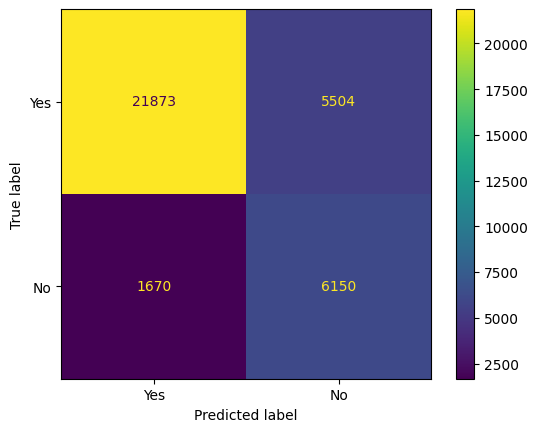

In [35]:
#Se obtienen métricas del modelo de Voting
print(classification_report(y_test, pred_voting, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_voting))
print('Area Under the Curve:  ', roc_auc_score(y_test, voting_ensemble.predict_proba(test_rain)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_voting, display_labels=['Yes', 'No'])
disp

In [41]:
#Se implementa el modelo Adaboost, el cual tiene 100 estimadores. Se entrena el modelo.
adaboost_ensemble = AdaBoostClassifier(n_estimators=100)
adaboost_ensemble.fit(smote_rain, smote_y)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [42]:
#Se obtienen las predicciones del set de test.
pred_adaboost = adaboost_ensemble.predict(test_rain)

              precision    recall  f1-score   support

         Yes       0.92      0.76      0.84     27377
          No       0.48      0.77      0.59      7820

    accuracy                           0.77     35197
   macro avg       0.70      0.77      0.71     35197
weighted avg       0.82      0.77      0.78     35197

Accuracy:  0.7656050231553826
Area Under the Curve:   0.85127643222086


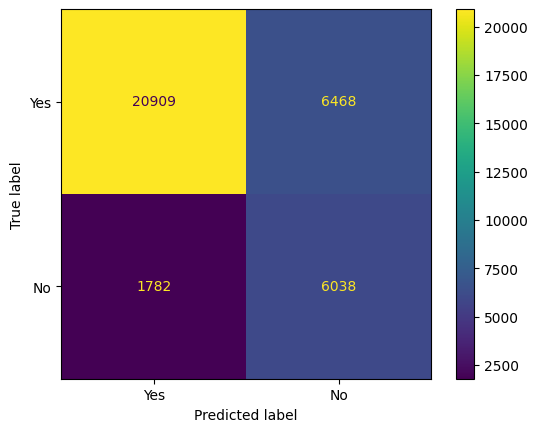

In [43]:
#Se obtienen las métricas del modelo de Adaboost.
print(classification_report(y_test, pred_adaboost, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_adaboost))
print('Area Under the Curve:  ', roc_auc_score(y_test, adaboost_ensemble.predict_proba(test_rain)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_adaboost, display_labels=['Yes', 'No'])
disp

In [45]:
#Se implementa un modelo ensamble Bagging, el cual utiliza el clasificador default de Decision Tree. Se utilizan 500 estimadores, siguiendo el código
#del libro de hands on coding. Se entrena el modelo.
bagging_ensemble = BaggingClassifier(n_estimators=500, n_jobs=1)
bagging_ensemble.fit(smote_rain, smote_y)

BaggingClassifier(n_estimators=500, n_jobs=1)

In [46]:
#Se obtienen las predicciones del set de test
pred_bagging = bagging_ensemble.predict(test_rain)

              precision    recall  f1-score   support

         Yes       0.91      0.71      0.80     27377
          No       0.43      0.76      0.55      7820

    accuracy                           0.72     35197
   macro avg       0.67      0.73      0.67     35197
weighted avg       0.80      0.72      0.74     35197

Accuracy:  0.7200045458419752
Area Under the Curve:   0.8085747860670843


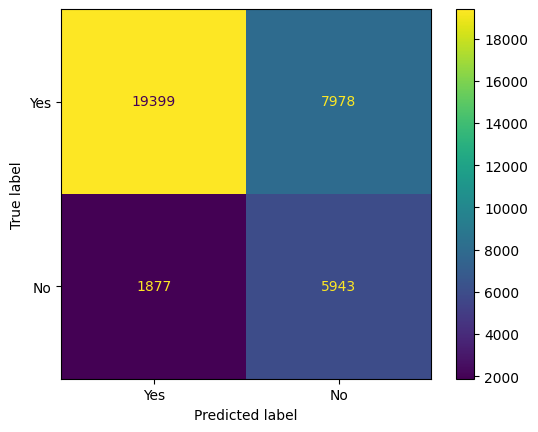

In [47]:
#Se obtienen métricas del método de Bagging
print(classification_report(y_test, pred_bagging, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_bagging))
print('Area Under the Curve:  ', roc_auc_score(y_test, bagging_ensemble.predict_proba(test_rain)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_bagging, display_labels=['Yes', 'No'])
disp

In [48]:
#Se implementa el método de Gradient Boosting, con un número de estimadores de 200. Se entrena el modelo.
gb_ensemble = GradientBoostingClassifier(n_estimators=200)
gb_ensemble.fit(smote_rain, smote_y)

GradientBoostingClassifier(n_estimators=200)

In [49]:
#Se obtienen las predicciones del set de test
pred_gb = gb_ensemble.predict(test_rain)

              precision    recall  f1-score   support

         Yes       0.94      0.64      0.76     27377
          No       0.40      0.87      0.55      7820

    accuracy                           0.69     35197
   macro avg       0.67      0.75      0.66     35197
weighted avg       0.82      0.69      0.71     35197

Accuracy:  0.6869903684973151
Area Under the Curve:   0.849568458112626


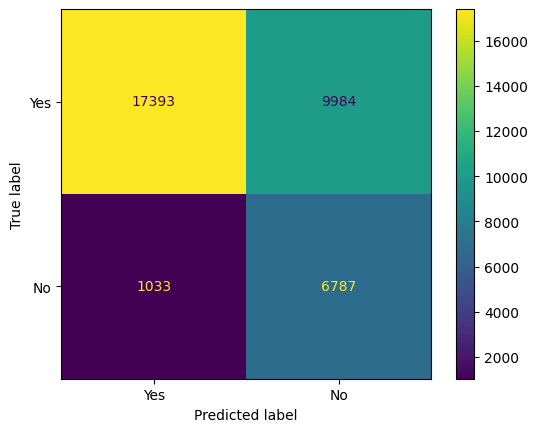

In [50]:
#Se calculan las métricas del modelo de Gradient Boosting
print(classification_report(y_test, pred_gb, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_gb))
print('Area Under the Curve:  ', roc_auc_score(y_test, gb_ensemble.predict_proba(test_rain)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_gb, display_labels=['Yes', 'No'])
disp

In [73]:
#Para poder utilizar el modelo XGboost, se reemplazan las etiquetas de tipo string a valores binarios.
smote_y_num = smote_y.where(smote_y != 'No', 0)
smote_y_num = smote_y_num.where(smote_y_num != 'Yes', 1)

In [60]:
#Se implementa el modelo XGboost y se entrena usando las etiquetas de tipo binario.
xgb_ensemble = xgb.XGBClassifier(max_depth=2)
xgb_ensemble.fit(smote_rain, smote_y_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
#El modelo XGboost realiza predicciones de set de test
pred_xgb = xgb_ensemble.predict(test_rain)

In [94]:
#Se convierten las predicciones a la clase de Series de Panda. Se reemplazan los valores binarios por los valores en string originales para
#obtener métricas.
pred_xgb = pd.Series(pred_xgb)
pred_xgb = pred_xgb.where(pred_xgb != 0, 'No')
pred_xgb = pred_xgb.where(pred_xgb != 1, 'Yes')

              precision    recall  f1-score   support

         Yes       0.92      0.77      0.84     27377
          No       0.49      0.78      0.60      7820

    accuracy                           0.77     35197
   macro avg       0.71      0.77      0.72     35197
weighted avg       0.83      0.77      0.79     35197

Accuracy:  0.7712020910873085
Area Under the Curve:   0.8578690650495632


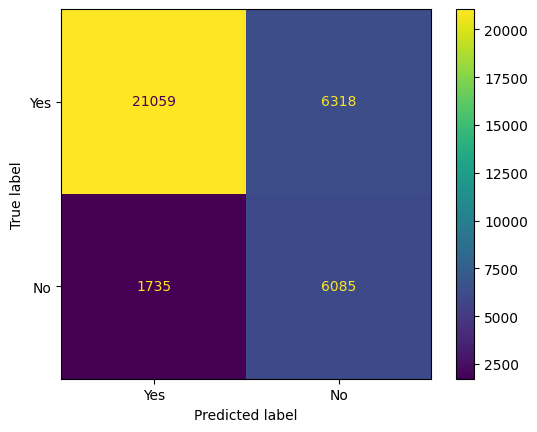

In [96]:
#Se calculan las métricas del model XGboost
print(classification_report(y_test, pred_xgb, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_xgb))
print('Area Under the Curve:  ', roc_auc_score(y_test, xgb_ensemble.predict_proba(test_rain)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb, display_labels=['Yes', 'No'])
disp

El método con mejor desempeño fue el de Voting, teniendo tanto una mejor Accuracy, como un mejor AUC. El método de Gradient Boosting tuvo el peor desempeño visto en términos de Accuracy, mientras que el método Bagging tuvo el peor desempeño en términos de AUC. La diferencia entre ambos es que el método de Gradient Boosting aumentó el número de Verdaderos Negativos (True Negatives, TN) y redujo el número de Falsos Positivos (False Positives, FP) a costa del número de Falsos Negativos (False Negatives). El método de Bagging tuve menos Falsos Negativos, por consiguiente teniendo un mayor número de Verdaderos Positivos (True Positives, TP). En este caso, me parece más importante tenga el menor número de Falsos Negativos y el mayor número de Verdaderos Positivos, por lo que, al final, considero que el modelo con el peor desempeño fue el de Gradient Boosting.

Quizá lo que le dió la ventaja al modelo de Voting fue la utilización de distintos modelos de clasificación hacer las predicciones, permitiendo así que los modelos procesaran la información de distintas maneras, permitiendo así que el modelo ensamble tuviera un mejor rendimiento a la hora de clasificar. Entre Adaboost y XGboost, utilizando el mismo pensamiento que se utilizó en los modelos anteriores, el modelo de XGboost trabaja mejor, debido a que tiene un mayor número de TP.